<a href="https://colab.research.google.com/github/AAMNAWAHEED/TSF/blob/main/task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AAMNA WAHEED 
GRIPMARCH'23

TASK 02
predict the optimum number of clusters 
and represent it visually. 


Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load data

In [ ]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


we are going to drop Id and species columns as they are not needed for clustering

In [ ]:
del iris_df['Id']

In [ ]:
del iris_df['Species']

In [ ]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x=iris_df.iloc[:,:]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#n_clusters=no. of clusters to form
#init='kmeans++=select initial centroid
#max_iter=maximum iterations to perform in single run by defalut 300
#n_init=Number of times the k-means algorithm is run with different centroid seeds.
x=iris_df.iloc[:,:].values
per_meas=[]
from sklearn.cluster import KMeans
for i in range(1,11):
       kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
       kmeans.fit(x)
       per_meas.append(kmeans.inertia_)
       #kmeans.inetri_ ===Inertia measures how well a dataset was clustered by K-Means
       print(kmeans.inertia_)


680.8244000000001
152.36870647733906
78.940841426146
57.317873214285704
46.56163015873016
38.930963049671746
34.19068792479663
30.06387443273313
27.879287878787892
26.04820224804435


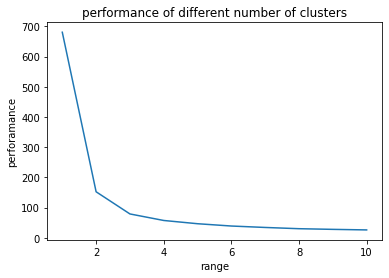

In [ ]:
#plotting on graph
plt.plot(range(1,11),per_meas)
plt.xlabel('range')
plt.ylabel('perforamance')
plt.title('performance of different number of clusters')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

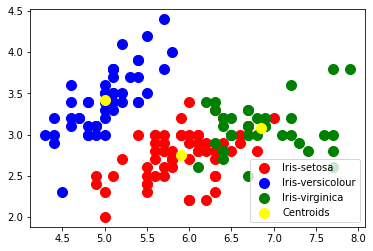

In [ ]:
#plotting
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
